# Homogeneous Transforms and their Inverse

Now we consider a more general case in which two reference frames are both simultaneously rotated and translated with respect to each other. Again we see a point, ${\large P }$, whose position is known relative to ${\large B_{0}}$ and we wish to find ${\large ^{A}\textbf{r}_{P/A_{0}}}$. In the case where the ${\large A}$ and ${ \large B}$ frames both had the same orientation, the solution was easily achieved with vector addition. If only we knew how to rotate one frame relative to another we could solve this problem...

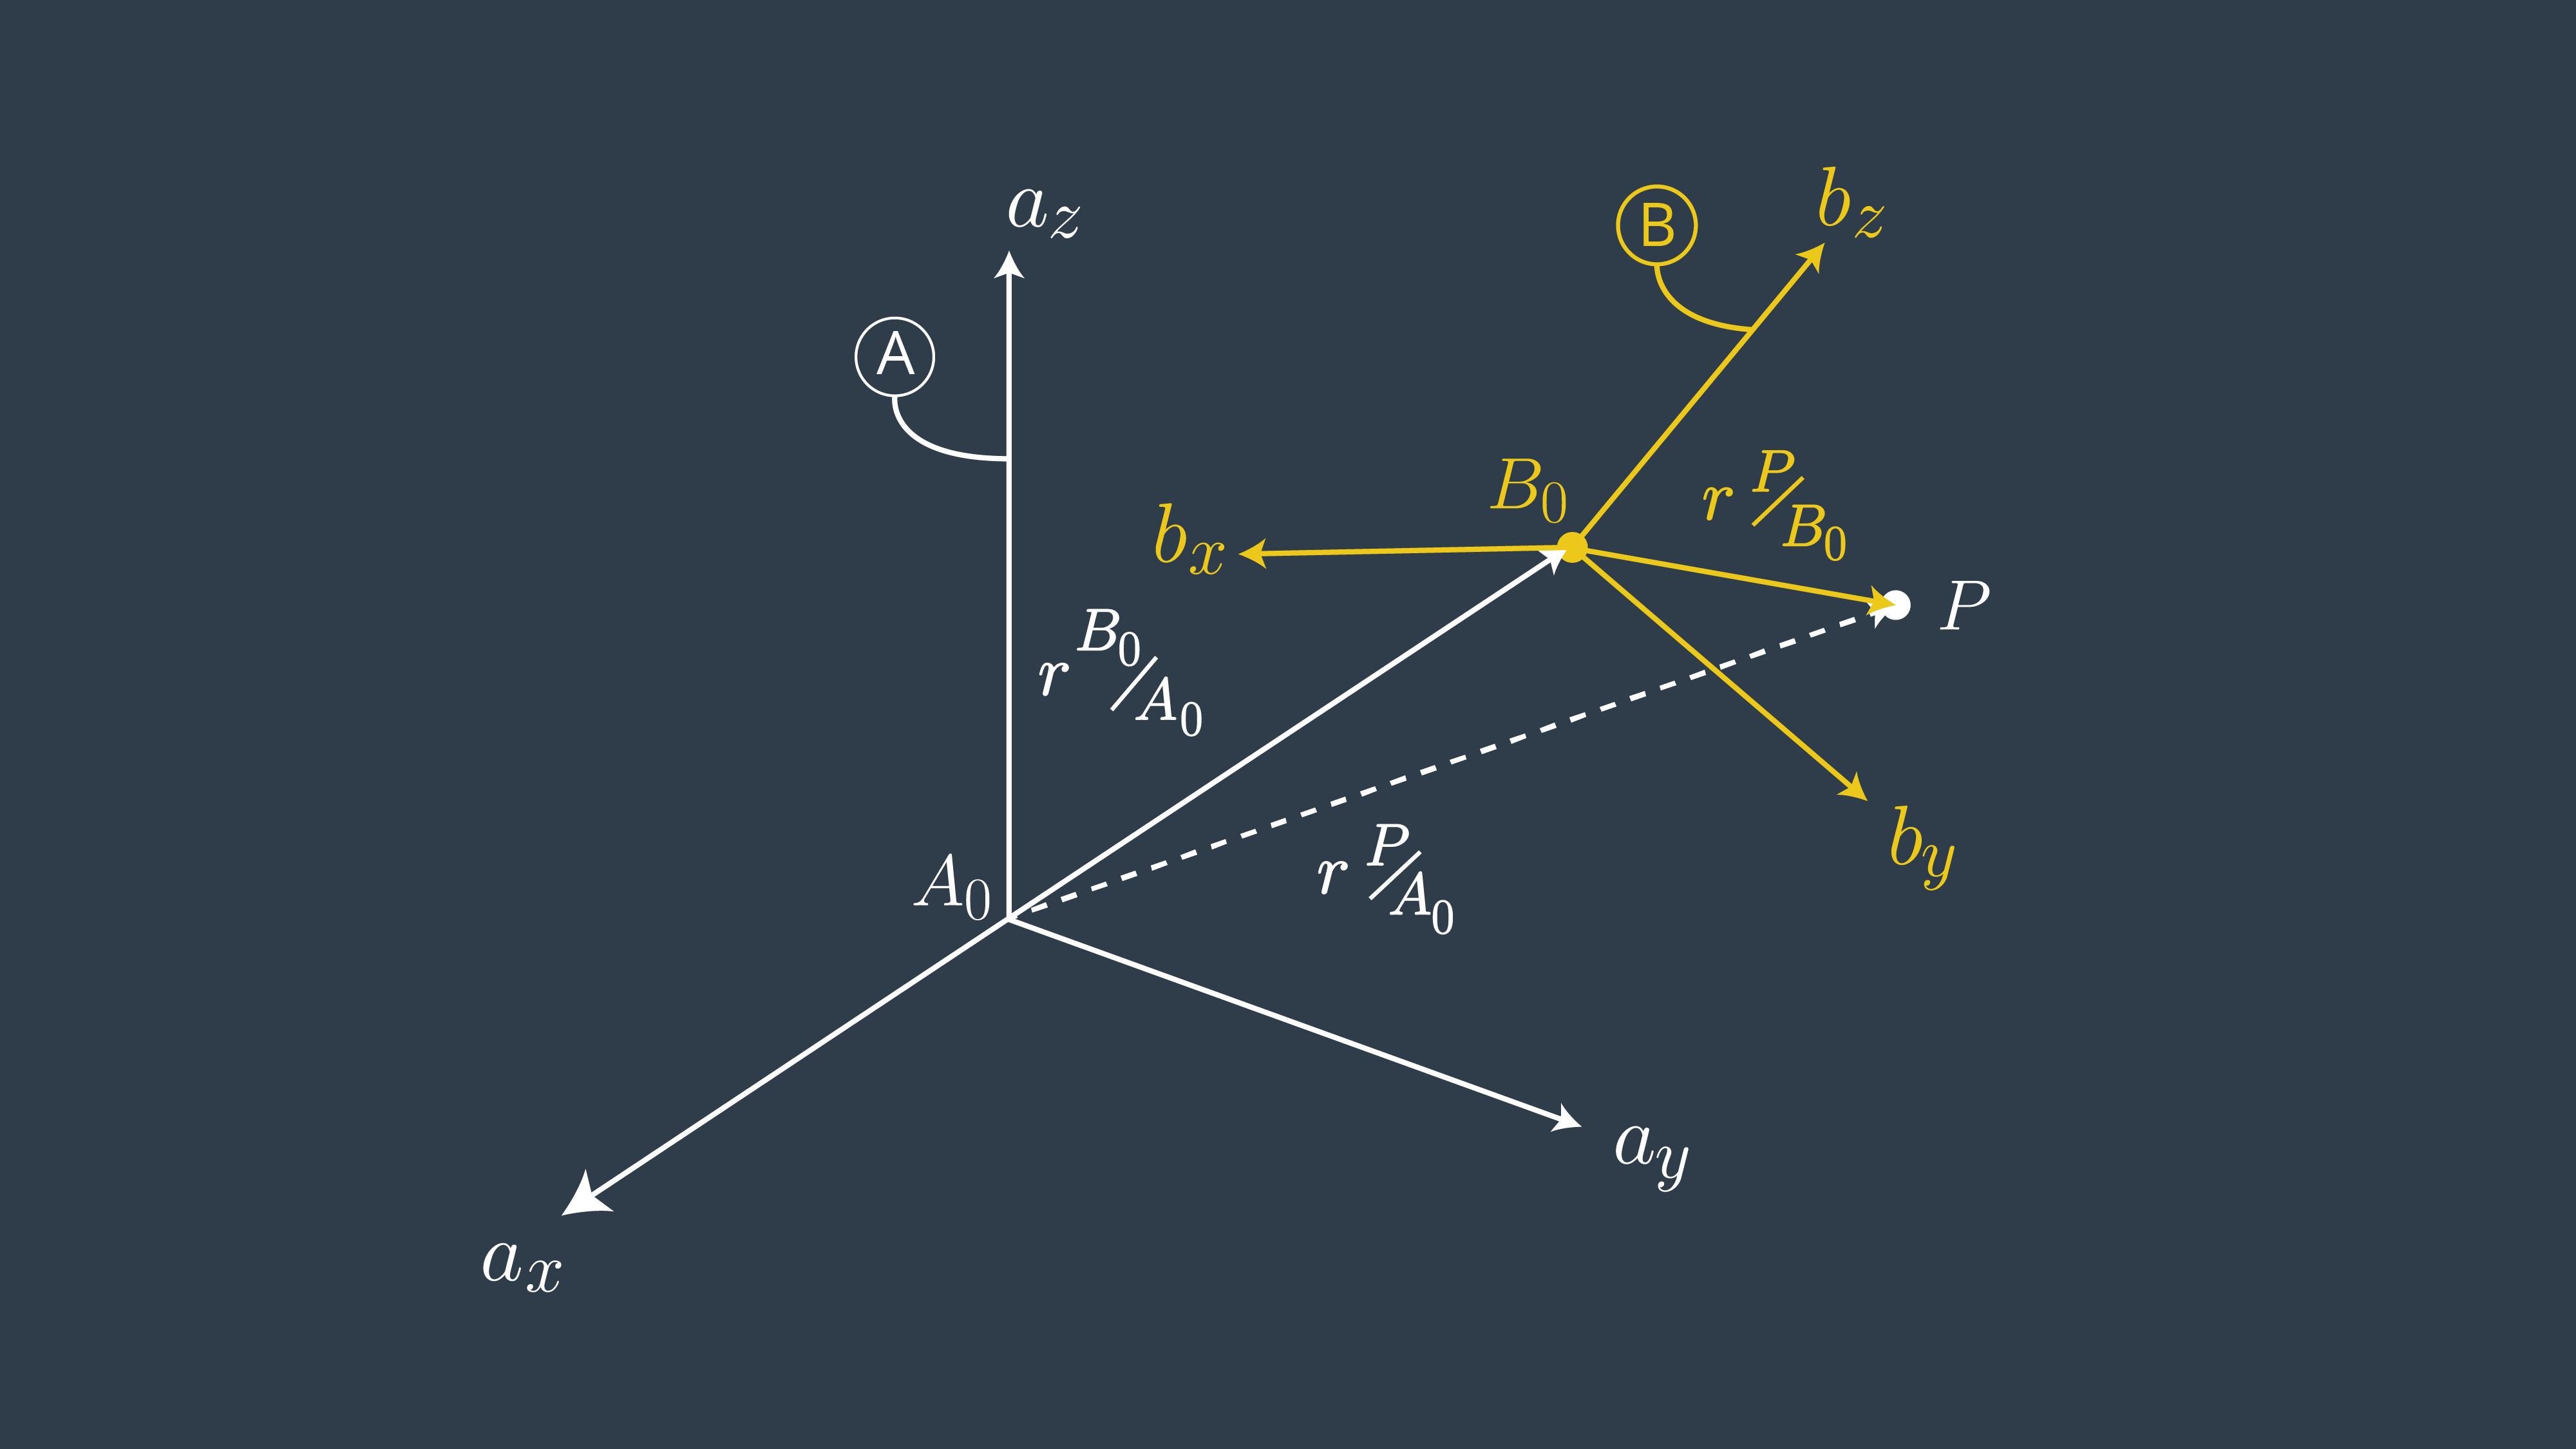

The solution is to first express ${\large ^{B}\textbf{r}_{P/B_{0}}}$ in terms of the A frame by applying a rotation matrix between B and A and then adding the offset of ${\large B_{0}}$ relative to ${\large A_{0}}$. In equation form, this is:

While the above equation is compact and easily read by humans, it doesn’t lend itself to manipulation by computers. It is possible however to cast equation (1) in matrix form using homogeneous coordinates and then make use of powerful linear algebra libraries that are available in many programming languages.

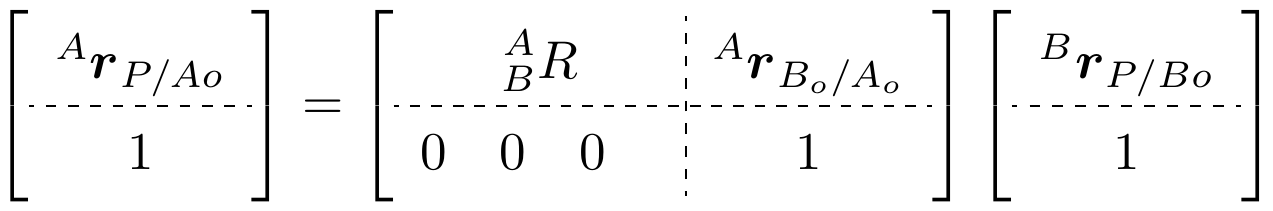

Equation (2) is shorthand notation for equation (3) below.

The left hand side is a 4x1 vector, the first three elements of which are the x,y,z coordinate of point P expressed in the A frame.

The first term on the right hand side of the equality is a 4x4 matrix called a homogeneous transform; it is composed of four subparts. ${\large \frac{A}{B}R}$ is the 3x3 rotation matrix. ${\large ^{A}\textbf{r}_{B_{0}/A_{0}}}$ is a 3x1 vector and represents the origin of the B frame relative to the A frame, expressed in terms of the A frame.

Because of the restrictions on dimensions for matrix multiplication, the last term on the right hand side must also be a 4x1 vector where ${\large ^{B}\textbf{r}_{P/B_{0}}}$ is the location of P relative to ${B_{0}}$ and expressed in terms of the B frame.

The notation for homogeneous transforms is similar to that of rotation matrices, a capital "${\textbf{T}}$" (for transform) is used with leading super and subscripts. For example, ${ \frac{A}{B}\textbf{T}}$ is the homogeneous transform between A and B.

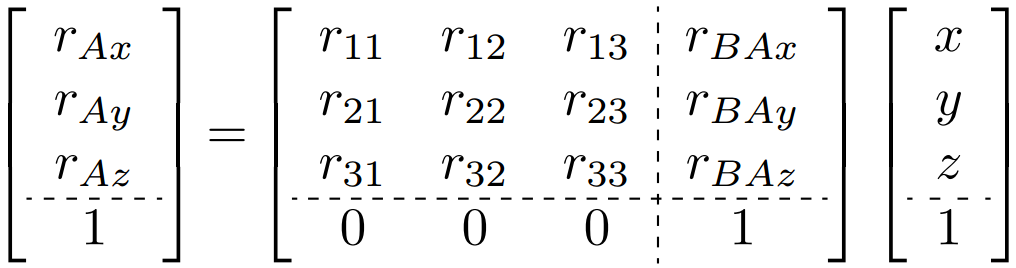

Upon multiplying the two matrices on the right, it becomes clear how the matrix form relates to our original equation (1).

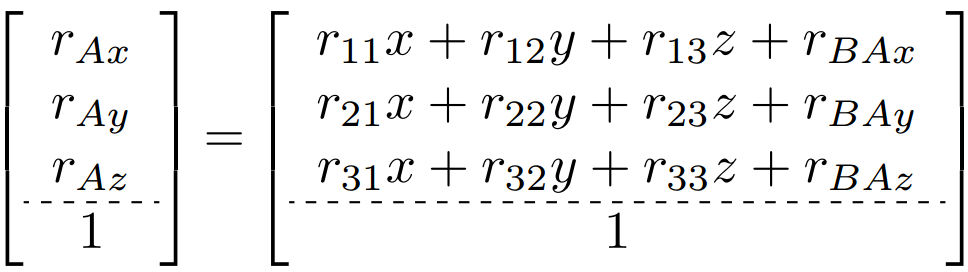

We can apply our newfound knowledge of homogeneous transformations to calculate the position of a robot arm's end effector. Given the initial position of point P with respect to reference frame C, below. What is the position of the point with respect to reference frame B, given the rotations and the translations in the image?

Recall from the previous lesson that the offset for a translation is calculated from the perspective of the new frame, in our case reference frame B. Thus the translation is 34 units in the positive z-direction.

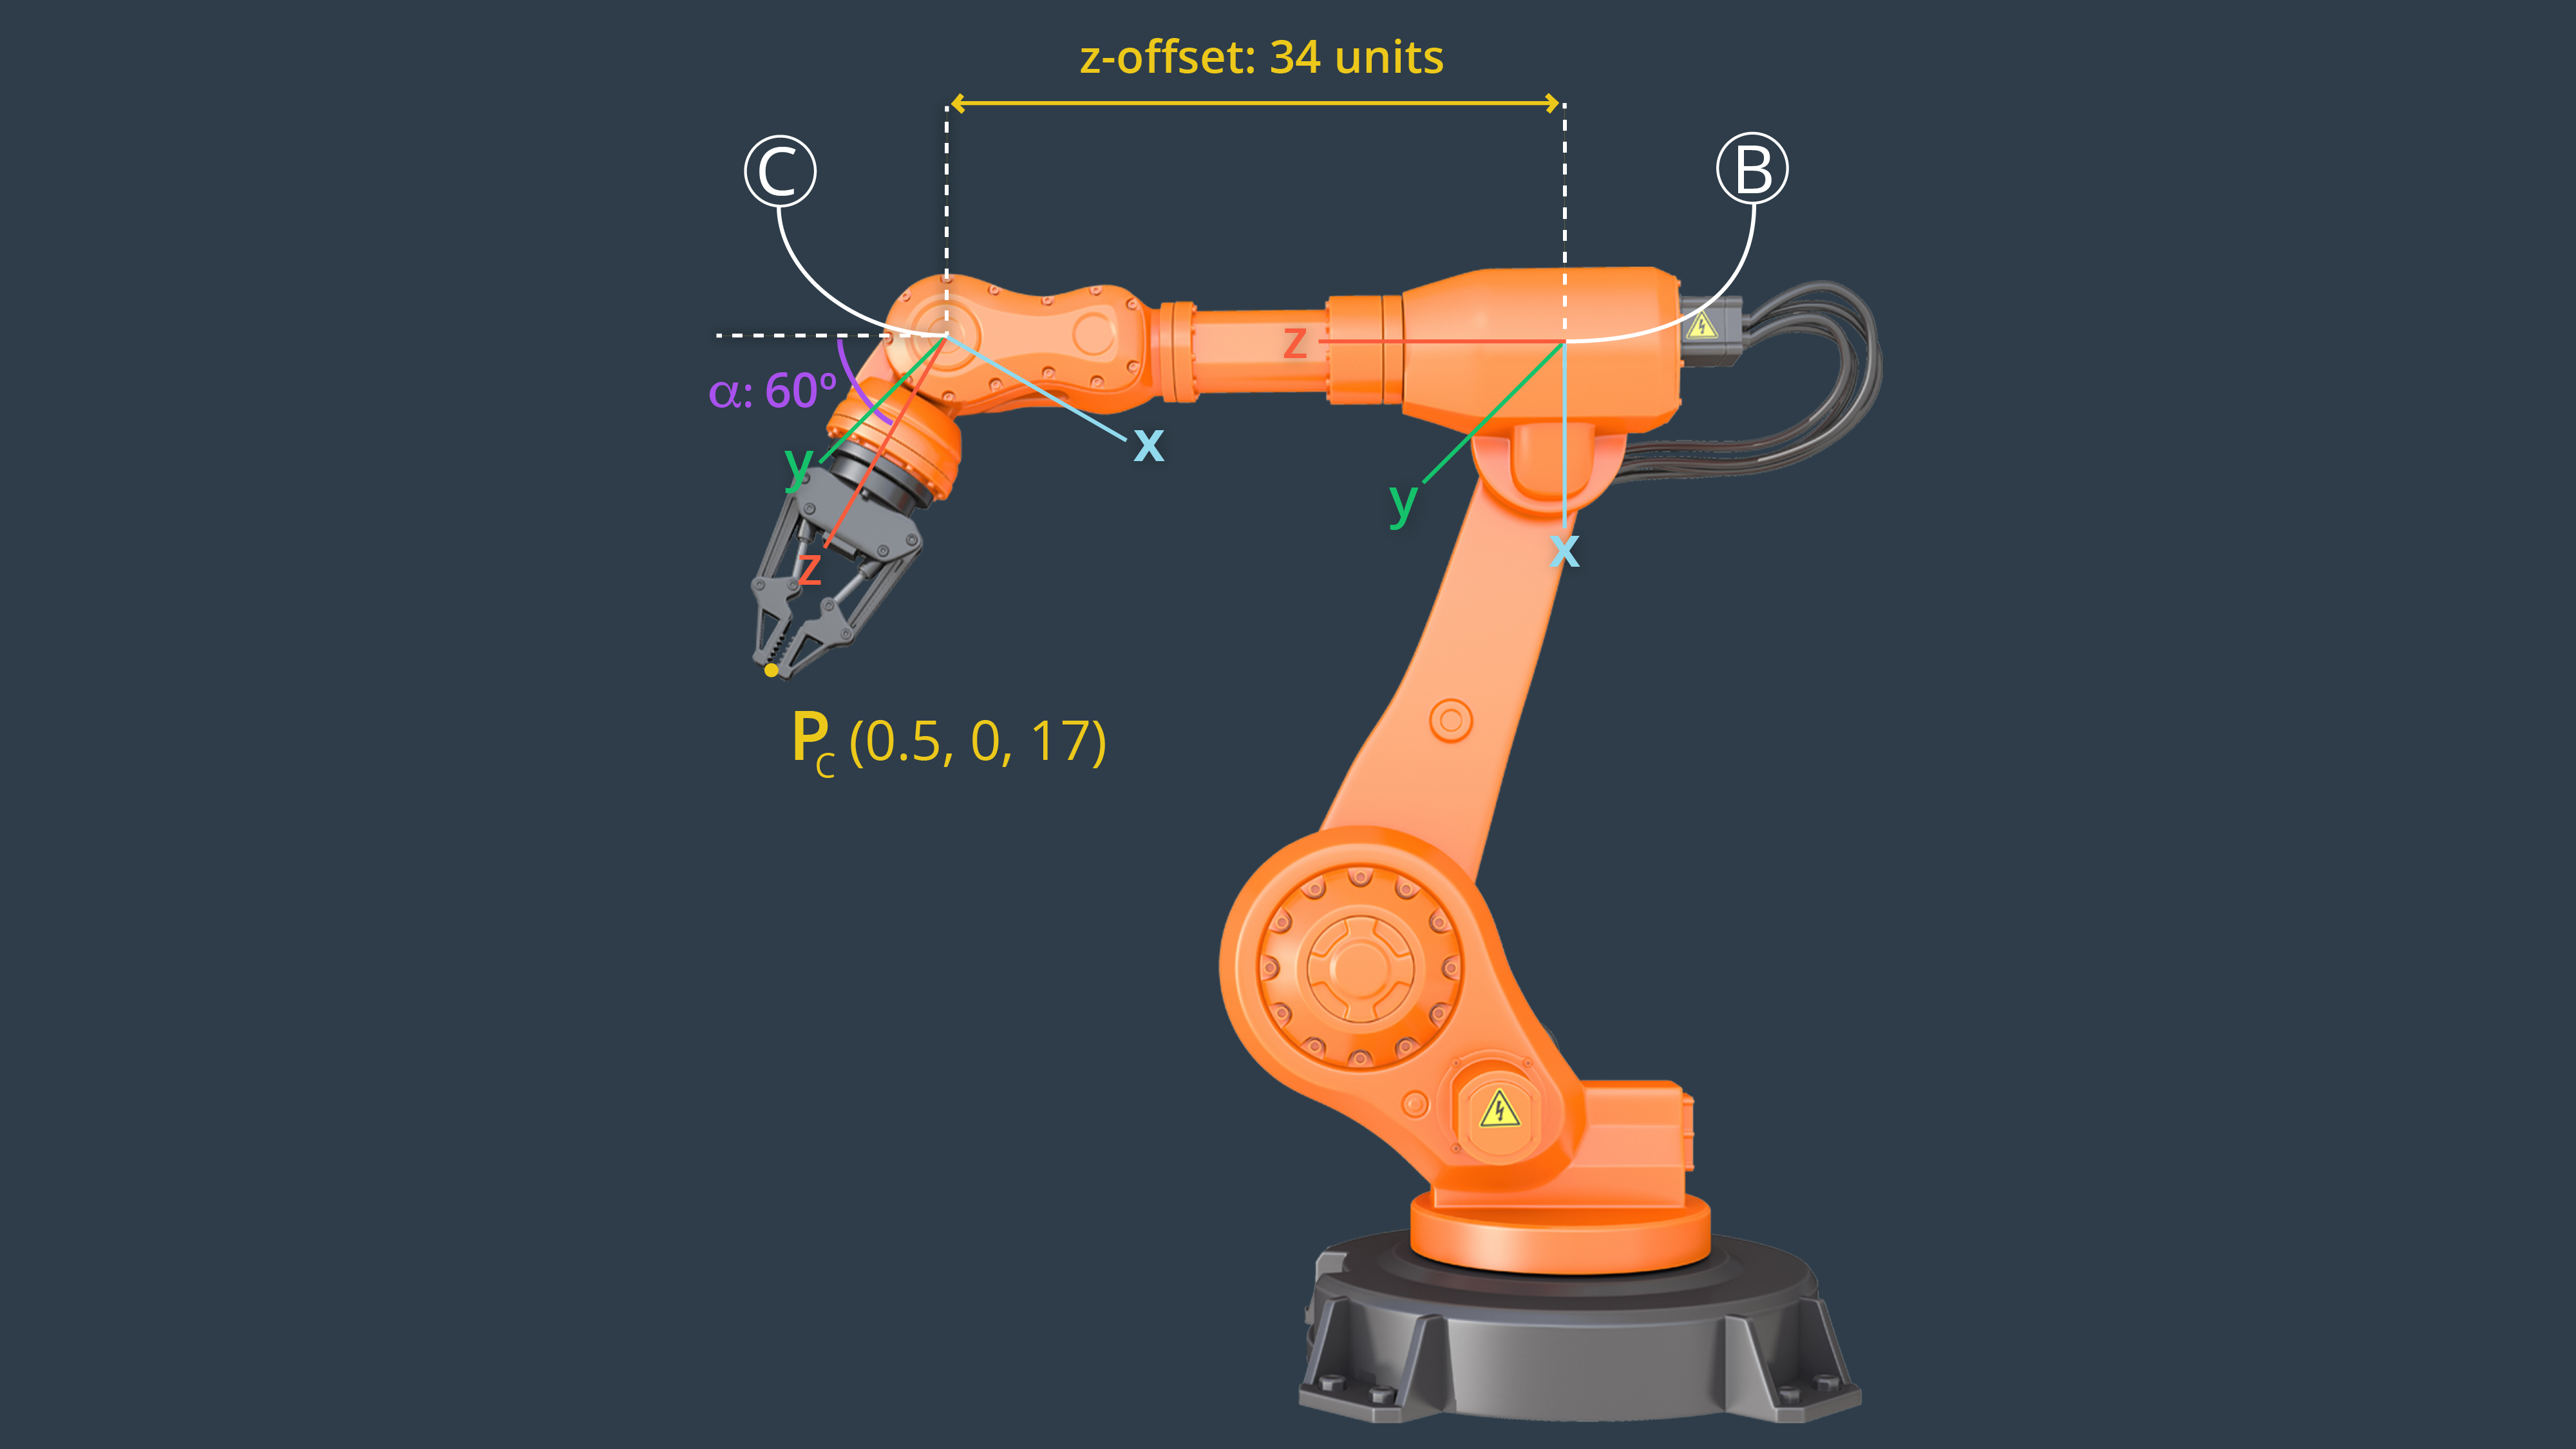

The first step is to setup our homogeneous transform matrix from to include a 60 degree rotation about the y-axis, and a 34 unit translation along the z-axis. Next, we multiply the homogeneous transform by a matrix that contains the position of point P (0.5, 0, 17).

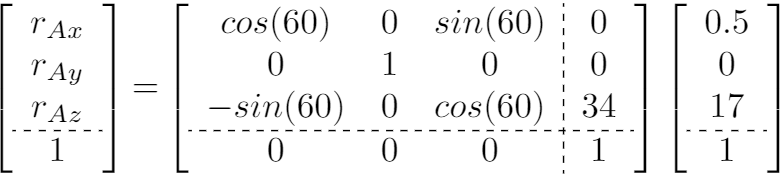

Multiplying out the right-hand side of the equation, we get the following result.

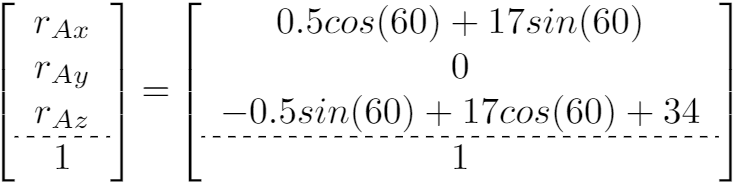

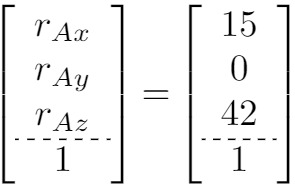

Try your own homogeneous transform, very similar to the one we have completed above. Now that we know the position of the end effector with respect to reference frame B, we can apply another transformation to calculate its position with respect to reference frame A, which is attached to Link #1.

Given the parameters below, create the appropriate matrices in code and calculate the position of P.

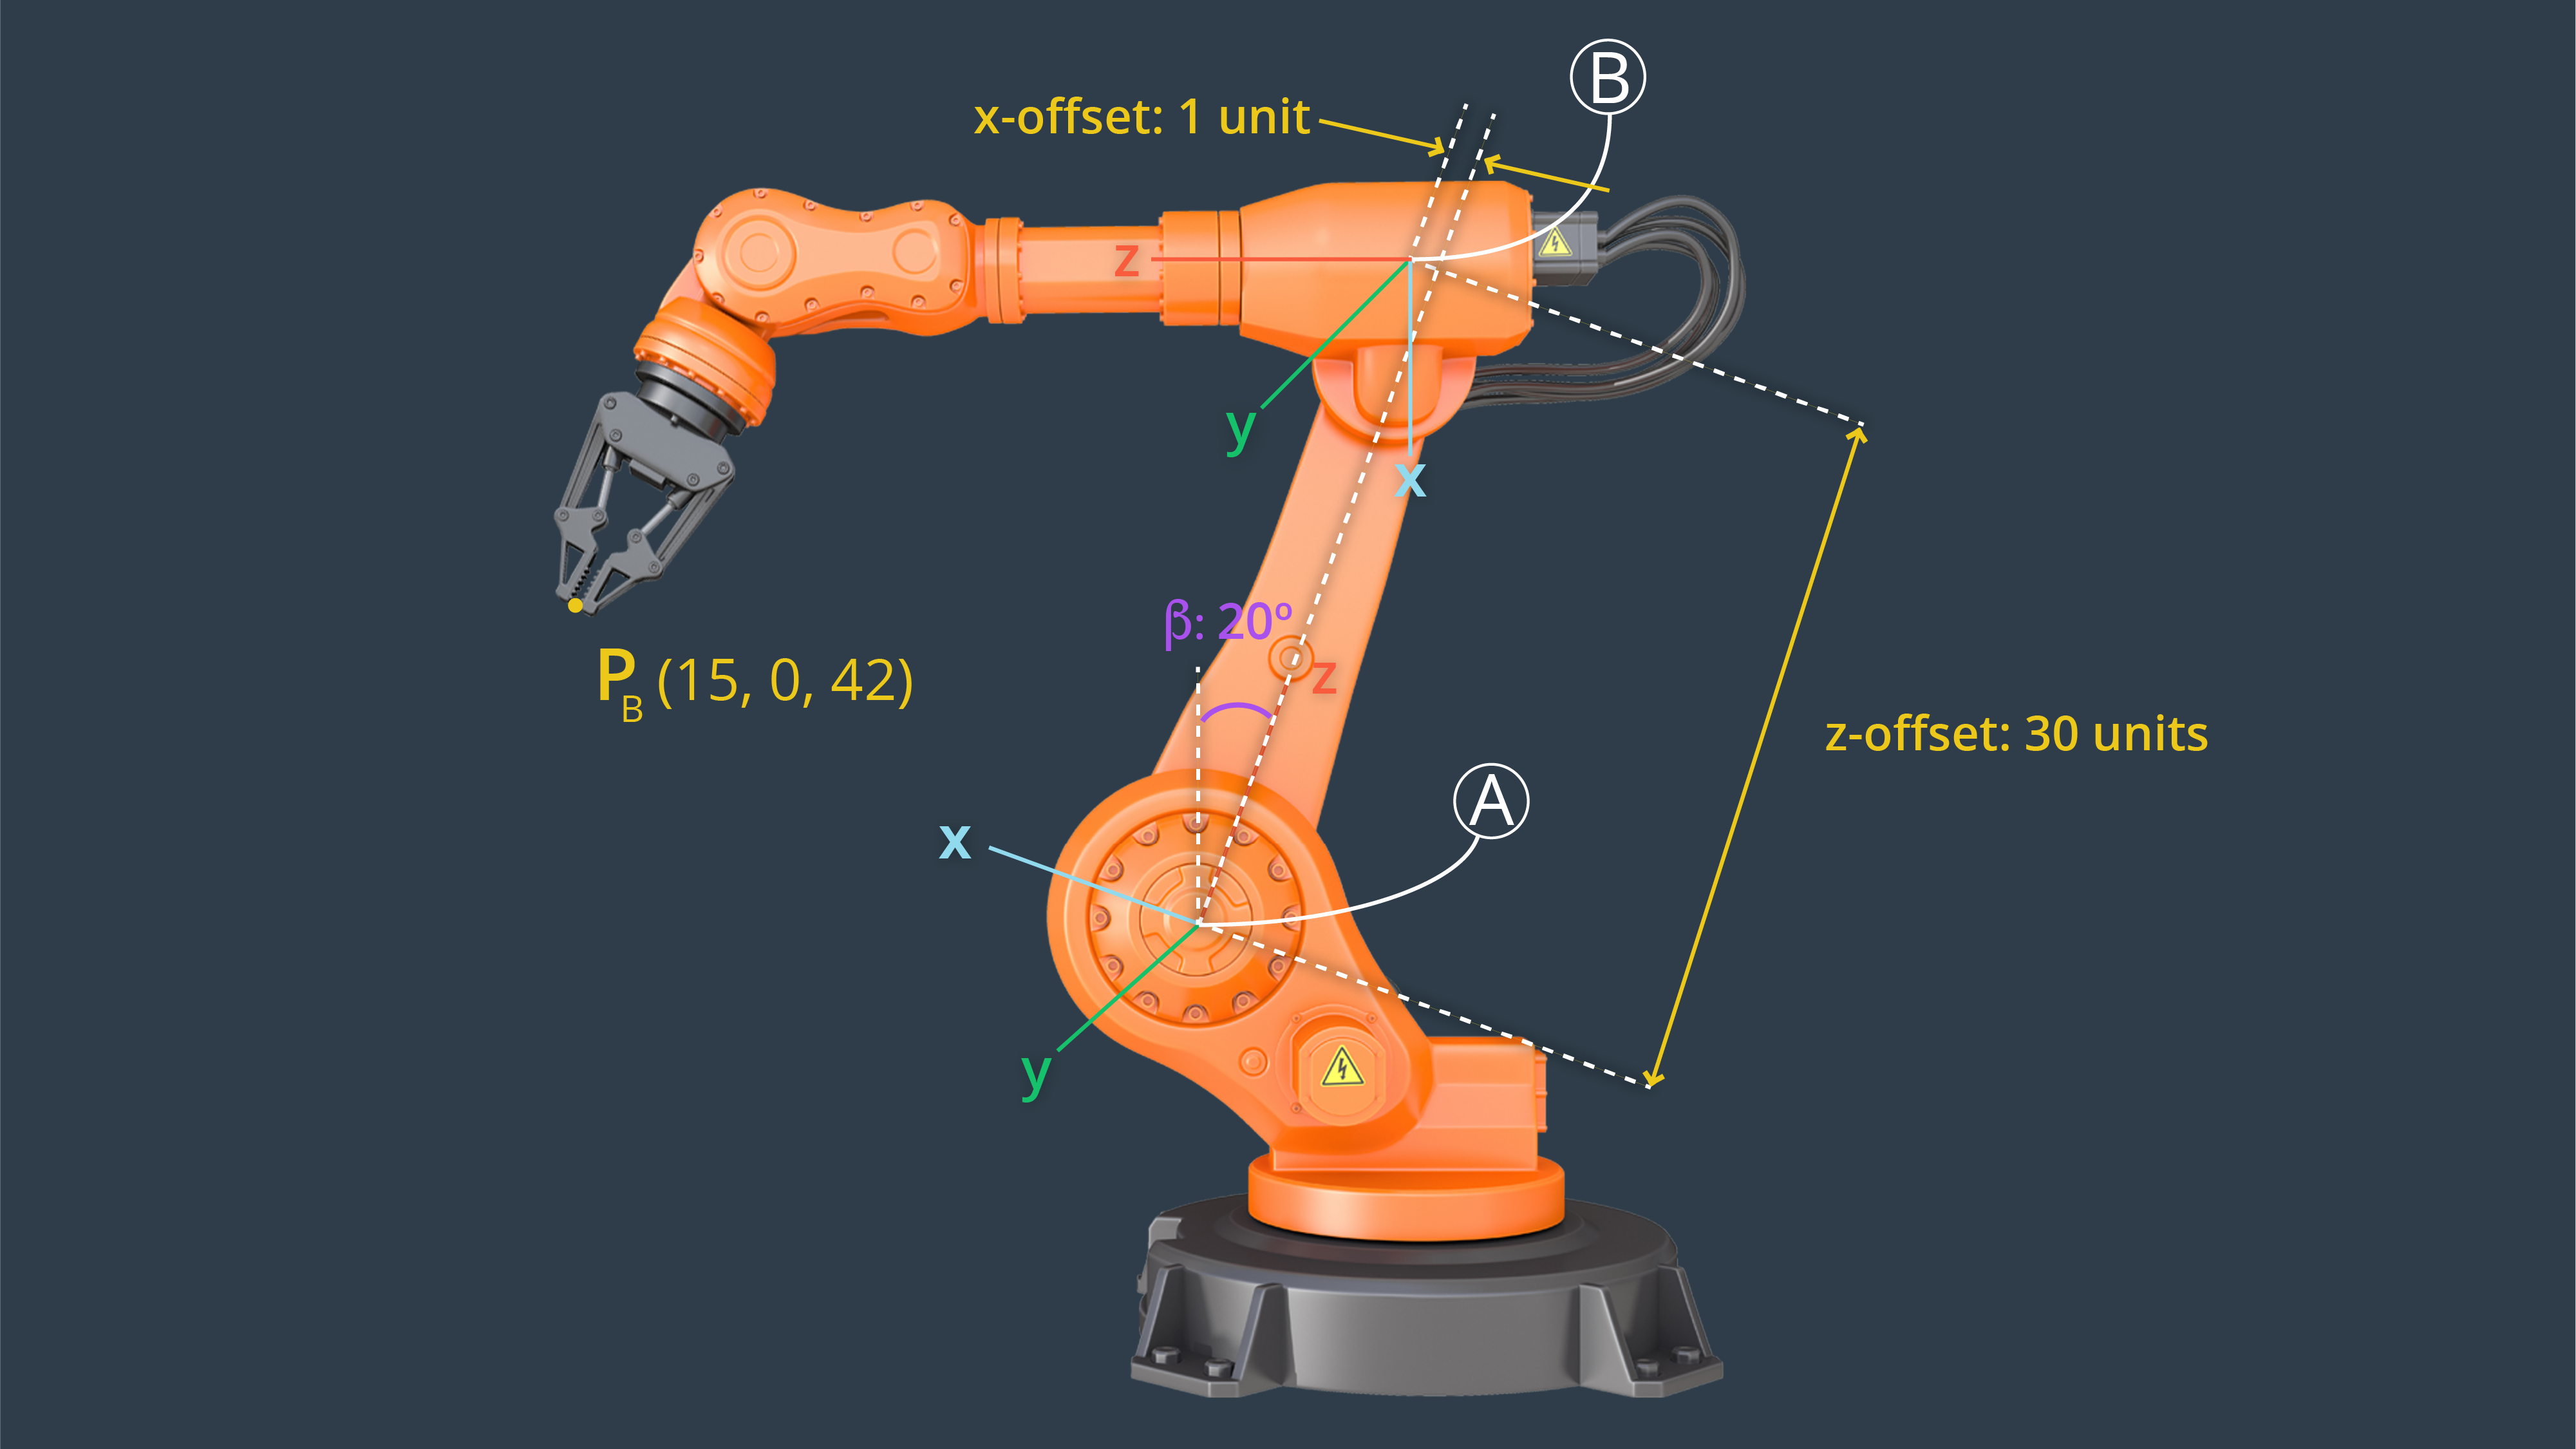


In [1]:
#!usr/bin/env python

from sympy import symbols, cos, sin, pi, simplify, sqrt, atan2
from sympy.matrices import Matrix

# Conversion Factors
rtd = 180./pi # radians to degrees
dtr = pi/180. # degrees to radians

# Nice printing
from sympy import init_printing
init_printing()

###############################################################
# Problem Statement:
  # Let P be a vector expressed in frame {B} with (x,y,z)
  # coordinates = (15.0, 0.0, 42.0)
  # Rotate P about the Y-axis by angle = 110 degrees. 
  # Then translate the vector 1 unit
  # in the X-axis and 30 units in the Z-axis. 
  # Print the new (x, y, z) coordinates of P after the transformation.  
###############################################################
#### Create symbols for joint variables
q1 = symbols('q1')
gamma  = symbols('gamma')


# Construct P in {B}
P = Matrix([15.0,0.0,42.0,1]) # P should be a 4x1 Matrix
print('P is a vector expressed in frame {B} with coords 15,0,42')
P



P is a vector expressed in frame {B} with coords 15,0,42


⎡15.0⎤
⎢    ⎥
⎢0.0 ⎥
⎢    ⎥
⎢42.0⎥
⎢    ⎥
⎣ 1  ⎦

In [15]:
# Homogeneous transform Y axis
T = Matrix([[cos(q1), 0, sin(q1), 1.0],
            [0,1,0,0.0],
            [-sin(q1),0,cos(q1),30.0],
            [0,0,0,1]]) # T Should be a 4x4 homogeneous Transform

print('The homogeneous transform about the Y axis is ')
T


The homogeneous transform about the Y axis is 


⎡cos(q₁)   0  sin(q₁)  1.0 ⎤
⎢                          ⎥
⎢   0      1     0     0.0 ⎥
⎢                          ⎥
⎢-sin(q₁)  0  cos(q₁)  30.0⎥
⎢                          ⎥
⎣   0      0     0      1  ⎦

In [18]:
P_new = simplify(T*P) 

print('Simplifying T*P is ')
P_new

Simplifying T*P is 


⎡ 42.0⋅sin(q₁) + 15.0⋅cos(q₁) + 1.0 ⎤
⎢                                   ⎥
⎢                 0                 ⎥
⎢                                   ⎥
⎢-15.0⋅sin(q₁) + 42.0⋅cos(q₁) + 30.0⎥
⎢                                   ⎥
⎣                 1                 ⎦

In [21]:
# Evaluate numerically
print("The new coordinates of P_A are :")
P_new.evalf(subs={q1: 110*dtr})

The new coordinates of P_A are :


⎡35.3367879231231⎤
⎢                ⎥
⎢       0        ⎥
⎢                ⎥
⎢1.53976466853328⎥
⎢                ⎥
⎣      1.0       ⎦

Now that we have seen how to compute a transform from an initial frame ${A}$ to another frame ${B}$, let’s consider the reverse operation: finding the transform from ${B}$ to ${A}$. The most basic method for inverting the transform is simply to invert the 4x4 matrix. However, given the orthonormal properties of rotation matrices it is possible to perform the inverse in a simpler, more computationally efficient form. We do not show the proof here, but the inverse transform can be written as:


One final note, which should hopefully come as no surprise,

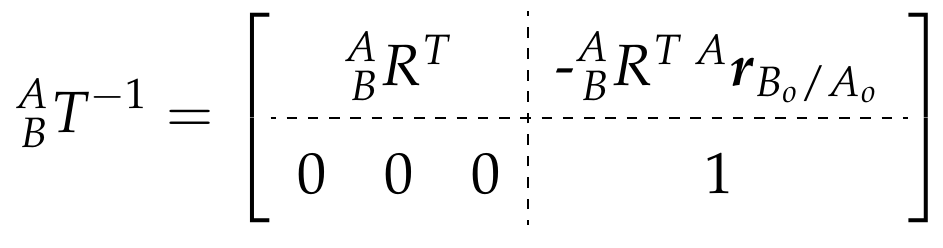